In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

In [10]:
class KNN:
    
    def __init__(self, cl1, cl2, cl3,k=2):
        #Loading Training Data 
        self.c1 =  np.array(pd.read_csv("./classification/"+cl1, header = None, delimiter = ' ').values.tolist())
        self.c2 =  np.array(pd.read_csv("./classification/"+cl2, header = None, delimiter = ' ').values.tolist())
        self.c3 =  np.array(pd.read_csv("./classification/"+cl3, header = None, delimiter = ' ').values.tolist())
        self.k = k
    
    def find_neighbours(self,point):
        dist = list()
        
        for i in self.c1 :
            dist.append([np.linalg.norm(point-i),'1'])

        for i in self.c2:
            dist.append([np.linalg.norm(point-i),'2'])
        
        for i in self.c3:
            dist.append([np.linalg.norm(point-i),'3'])
        
        dist.sort(key = lambda dist:dist[0]) #lambda for sorting criteria
        return dist
    
    
    def classify(self,points):
        Y_predicted = []
        for i in points:
            NNa = self.find_neighbours(i)
            count =[0,0,0]
            NN =NNa[:self.k]
            for j in NN:
                count[int(j[1])-1] +=1
                
            Y_predicted.append(count.index(max(count))+1)
        return(Y_predicted)

In [11]:
cl1 = "/nonlinearlySeparable/class1_train.txt"
cl2="/nonlinearlySeparable/class2_train.txt"
cl3="/nonlinearlySeparable/class3_train.txt"
a=KNN(cl1,cl2,cl3,k=6)
d = pd.DataFrame({'x':[],'y':[],'class':[]})
df = pd.read_csv("./classification"+cl1, header =None,delimiter = ' ')
c1 = np.array(df.values.tolist())
df = pd.read_csv("./classification"+cl2, header =None,delimiter = ' ')
c2 = np.array(df.values.tolist())
df = pd.read_csv("./classification"+cl3, header =None,delimiter = ' ')
c3 = np.array(df.values.tolist())

for i in range(len(c1)):
    d.loc[len(d.index)]=[c1[i][0],c1[i][1],1]
for i in range(len(c2)):
    d.loc[len(d.index)]=[c2[i][0],c2[i][1],2]
for i in range(len(c1)):
     d.loc[len(d.index)]=[c3[i][0],c3[i][1],3]


df = pd.read_csv("./classification/nonlinearlySeparable/class1_test.txt", header =None,delimiter = ' ')
c1 = c1 = np.array(df.values.tolist())
df = pd.read_csv("./classification/nonlinearlySeparable/class2_test.txt", header =None,delimiter = ' ')
c2 = np.array(df.values.tolist())
df = pd.read_csv("./classification/nonlinearlySeparable/class3_test.txt", header =None,delimiter = ' ')
c3 = np.array(df.values.tolist())
# a.classify(c1)


In [12]:
mini = d.min()
maxi = d.max()

xgrid = np.arange(mini[0], maxi[0], 0.1)
ygrid = np.arange(mini[1], maxi[1], 0.1)
xx,yy=np.meshgrid(xgrid,ygrid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
g=np.array(a.classify(grid))
z=g.reshape(yy.shape)


<function matplotlib.pyplot.show(close=None, block=None)>

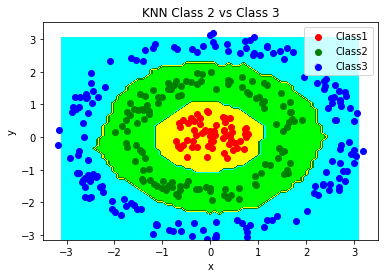

In [13]:

plt.contourf( xx,yy ,z, colors=['#ffff00', 'g', '#00ffff', '#00ff00', 'g'])
# plt.scatter(c1[:,0],c1[:,1],color='red',label='Class1')
# plt.scatter(c2[:,0],c2[:,1],color='green',label='Class2')
# plt.scatter(c3[:,0],c3[:,1],color='blue',label='Class3')
plt.xlabel('x')
plt.ylabel('y')
plt.title('KNN Class 2 vs Class 3')
plt.legend()
plt.show

# yy.size
# xx.size





In [14]:
yy.max()


3.0554000000000054